In [15]:
class OperationCounter:
    def __init__(self):
        self.count = 0  # Liczba operacji zmiennoprzecinkowych
        
    def add(self, val):
        self.count += val  # Dodaj operacje dodawania

    def multiply(self, val):
        self.count += val  # Dodaj operacje mnożenia

In [16]:
def traditional_matrix_multiplication(A, B, counter):
    n = len(A)
    C = [[0] * n for _ in range(n)]
    
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
                counter.multiply(1)  # Zliczamy mnożenie
                counter.add(1)  # Zliczamy dodawanie
    
    return C

In [17]:
def add_matrix(A, B, counter):
    """Dodaje dwie macierze i zlicza operacje"""
    n = len(A)
    counter.add(n * n)
    return [[A[i][j] + B[i][j] for j in range(n)] for i in range(n)]

def split_matrix(A):
    """Dzieli macierz na 4 podmacierze"""
    n = len(A)
    mid = n // 2
    A11 = [[A[i][j] for j in range(mid)] for i in range(mid)]
    A12 = [[A[i][j] for j in range(mid, n)] for i in range(mid)]
    A21 = [[A[i][j] for j in range(mid)] for i in range(mid, n)]
    A22 = [[A[i][j] for j in range(mid, n)] for i in range(mid, n)]
    return A11, A12, A21, A22

def merge_matrices(C11, C12, C21, C22):
    """Łączy 4 podmacierze w jedną macierz"""
    n = len(C11) * 2
    C = [[0] * n for _ in range(n)]
    mid = n // 2
    for i in range(mid):
        for j in range(mid):
            C[i][j] = C11[i][j]
            C[i][j + mid] = C12[i][j]
            C[i + mid][j] = C21[i][j]
            C[i + mid][j + mid] = C22[i][j]
    return C

def recursive_matrix_multiplication(A, B, l, counter):
    """Rekurencyjne mnożenie macierzy z liczeniem operacji"""
    n = len(A)
    
    # Warunek podstawowy: gdy macierz jest 1x1, mnożymy skalarne elementy
    if n == 1:
        counter.multiply(1)
        return [[A[0][0] * B[0][0]]]
    
    if n <= 2**l:
        return traditional_matrix_multiplication(A, B, counter)
    else:
        # Podział macierzy A i B
        A11, A12, A21, A22 = split_matrix(A)
        B11, B12, B21, B22 = split_matrix(B)
    
        # Rekurencyjne mnożenie podmacierzy
        M1 = recursive_matrix_multiplication(A11, B11, l, counter)
        M2 = recursive_matrix_multiplication(A12, B21, l, counter)
        M3 = recursive_matrix_multiplication(A11, B12, l, counter)
        M4 = recursive_matrix_multiplication(A12, B22, l, counter)
        M5 = recursive_matrix_multiplication(A21, B11, l, counter)
        M6 = recursive_matrix_multiplication(A22, B21, l, counter)
        M7 = recursive_matrix_multiplication(A21, B12, l, counter)
        M8 = recursive_matrix_multiplication(A22, B22, l, counter)
    
        # Obliczanie wynikowych podmacierzy
        C11 = add_matrix(M1, M2, counter)
        C12 = add_matrix(M3, M4, counter)
        C21 = add_matrix(M5, M6, counter)
        C22 = add_matrix(M7, M8, counter)
    
    # Łączenie wynikowych podmacierzy
    return merge_matrices(C11, C12, C21, C22)

In [18]:
import numpy as np
import time

# Parametry
l_values = [1, 2, 4, 6, 8]
ks = list(range(2, 12))
times_recursive_l = {l: [] for l in l_values}
operations_recursive_l = {l: [] for l in l_values}

for k in ks:
    n = 2**k
    A = np.random.rand(n, n).tolist()
    B = np.random.rand(n, n).tolist()
    
    for l in l_values:
        counter_rec = OperationCounter()
        start = time.time()
        recursive_matrix_multiplication(A, B, l, counter_rec)
        end = time.time()
        
        times_recursive_l[l].append(end - start)
        operations_recursive_l[l].append(counter_rec.count)

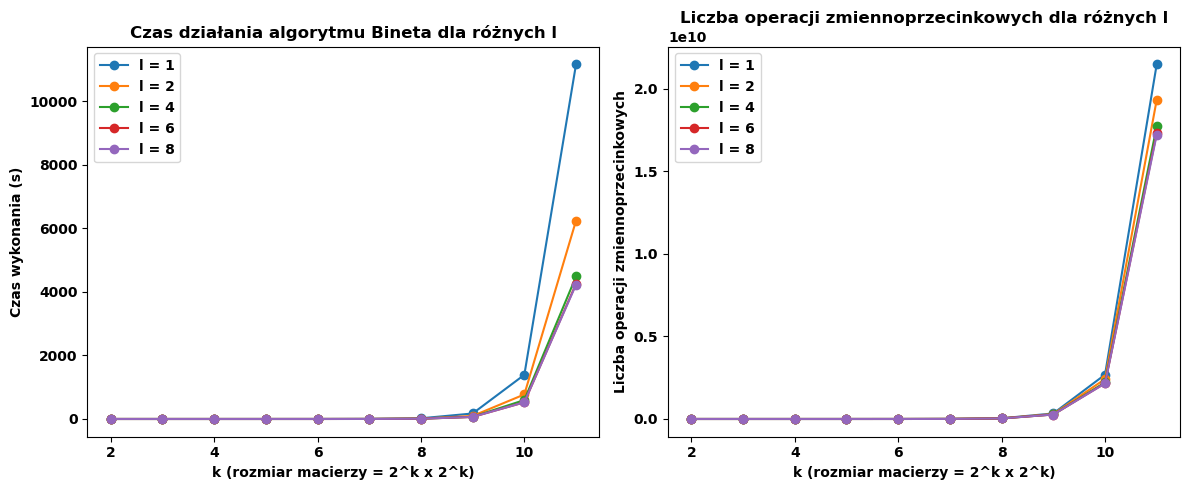

In [19]:
import matplotlib.pyplot as plt

# Tworzenie wykresów
plt.figure(figsize=(12, 5))

# Wykres czasu działania
plt.subplot(1, 2, 1)
for l in l_values:
    plt.plot(ks, times_recursive_l[l], label=f"l = {l}", marker='o')
plt.xlabel("k (rozmiar macierzy = 2^k x 2^k)")
plt.ylabel("Czas wykonania (s)")
plt.title("Czas działania algorytmu Bineta dla różnych l")
plt.legend()

# Wykres liczby operacji zmiennoprzecinkowych
plt.subplot(1, 2, 2)
for l in l_values:
    plt.plot(ks, operations_recursive_l[l], label=f"l = {l}", marker='o')
plt.xlabel("k (rozmiar macierzy = 2^k x 2^k)")
plt.ylabel("Liczba operacji zmiennoprzecinkowych")
plt.title("Liczba operacji zmiennoprzecinkowych dla różnych l")
plt.legend()

plt.tight_layout()
plt.show()


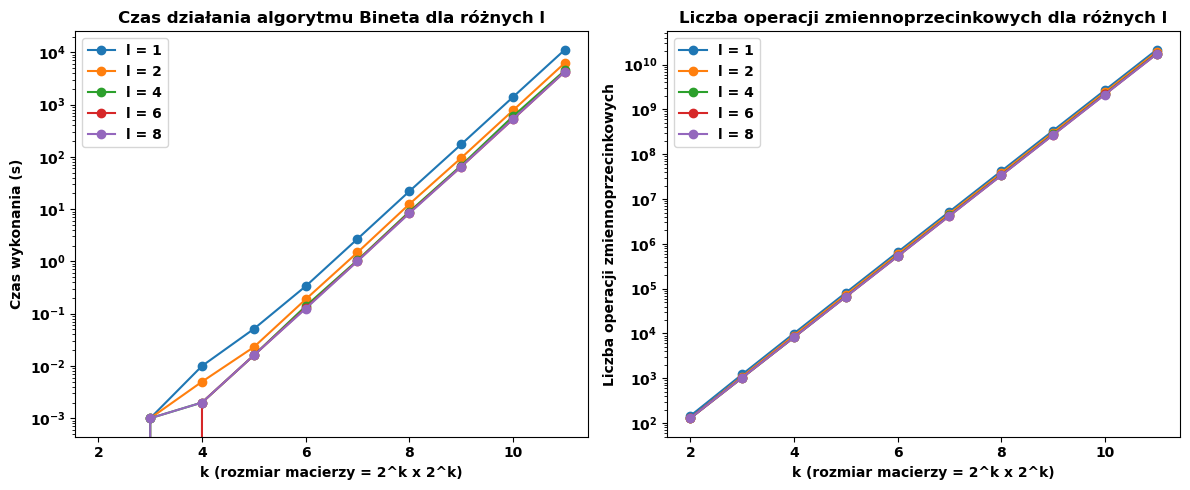

In [20]:
# Tworzenie wykresów
plt.figure(figsize=(12, 5))

# Wykres czasu działania
plt.subplot(1, 2, 1)
for l in l_values:
    plt.plot(ks, times_recursive_l[l], label=f"l = {l}", marker='o')
plt.xlabel("k (rozmiar macierzy = 2^k x 2^k)")
plt.ylabel("Czas wykonania (s)")
plt.title("Czas działania algorytmu Bineta dla różnych l")
plt.legend()
plt.yscale("log")

# Wykres liczby operacji zmiennoprzecinkowych
plt.subplot(1, 2, 2)
for l in l_values:
    plt.plot(ks, operations_recursive_l[l], label=f"l = {l}", marker='o')
plt.xlabel("k (rozmiar macierzy = 2^k x 2^k)")
plt.ylabel("Liczba operacji zmiennoprzecinkowych")
plt.title("Liczba operacji zmiennoprzecinkowych dla różnych l")
plt.legend()
plt.yscale("log")

plt.tight_layout()
plt.show()